# The Spark Foundation -  Graduate Rotational Internship Program
## Data science and Business Analytics
## Batch - November 2021 
## Author : Praveen Titus F
## Task - 2 : Prediction using Unsupervised Machine Learning
### Dataset : https://bit.ly/3kXTdox 
### Problem : Predicting optimum number of clusters, and representing it visually

In [11]:
# Importing libraries
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
# Importing Iris csv file
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'PetalWidthCm')

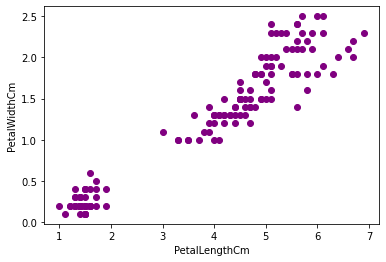

In [21]:
# Plotting PetalLengthCm as x-axis and PetalWidthCm as y-axis
plt.scatter(df.PetalLengthCm,df.PetalWidthCm, c = 'purple')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

### Elbow Plot

In [14]:
# creating elbow plot to find k
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

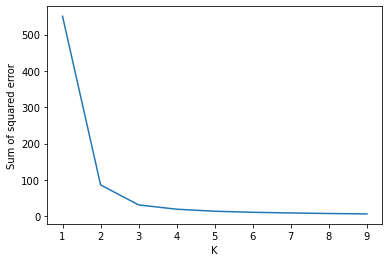

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#### From the above graph we can conclude that the clusters = 3

In [16]:
# Clustering the Iris dataset using varaibles PetalLengthCm and PetalWidthCm
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

### Visualization

Stars represent centroid of each group


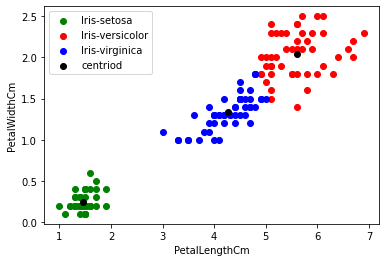

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.PetalLengthCm,df1['PetalWidthCm'],color='green', label = 'Iris-setosa')
plt.scatter(df2.PetalLengthCm,df2['PetalWidthCm'],color='red', label = 'Iris-versicolor' )
plt.scatter(df3.PetalLengthCm,df3['PetalWidthCm'],color='blue', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'black', label = 'centriod')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
print("Stars represent centroid of each group")